In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import requests
import json
import time
from mlxtend.plotting import category_scatter
from matplotlib import cm

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 5)

In [3]:
sns.set()

In [4]:
rating16_22 = pd.read_csv('../Datasets/cleaned_data/FIFA16-22_rating_new.csv')

In [5]:
rating16_22.head()

,short_name,long_name,player_positions,overall,age,height,weight,nationality,nation_position,preferred_foot,skill_moves,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle
0,C. Lloyd,Carli Anne Hollins,"CM, CAM, LM, ST",91,32,173,64,United States,LCM,Right,3,75.0,83.0,83.0,85.0,82.0,84.0,72,83,71,88,64,86,76,80,87,86,75,75,74,91,77,81,77,92,81,89,84,90,90,86,82,NaN,76,86,79
1,M. Rapinoe,Megan Anna Rapinoe,"LM, CM",90,29,170,60,United States,LM,Left,4,74.0,74.0,90.0,89.0,46.0,68.0,94,73,65,93,72,92,86,78,91,91,74,74,83,84,69,77,74,84,73,71,35,45,84,86,84,NaN,42,44,46
2,A. Wambach,Abby Wambach,ST,90,35,180,81,United States,LS,Right,3,72.0,89.0,65.0,80.0,39.0,82.0,53,93,91,71,83,82,53,59,66,83,73,72,56,91,75,86,62,74,94,83,68,35,91,71,86,NaN,39,28,27
3,L. Nécib,Louisa Nécib,"LM, CAM",90,28,168,56,France,LM,Right,4,84.0,74.0,87.0,90.0,53.0,69.0,84,76,58,91,80,90,78,81,83,92,85,83,91,89,78,72,54,80,68,67,60,52,84,91,85,NaN,51,56,44
4,N. Keßler,Nadine Keßler,CM,89,27,169,61,Germany,SUB,Right,4,74.0,84.0,85.0,83.0,78.0,74.0,76,87,76,90,78,84,75,72,88,85,75,73,73,91,73,80,69,77,73,82,76,86,86,88,82,NaN,68,82,77


In [6]:
rating16_22.shape

(2244, 46)

In [7]:
len(rating16_22['short_name'].unique())

735

In [8]:
len(rating16_22['long_name'].unique())

721

In [9]:
rating16_22_avg = rating16_22.groupby(by = ['short_name', 'long_name'], as_index = False).mean()

In [10]:
duplicateRows = rating16_22_avg[rating16_22_avg.short_name.duplicated(keep = False)]
duplicateRows

,short_name,long_name,overall,age,height,weight,skill_moves,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle
54,A. Stolsmo Hegerberg,Ada Martine Stolsmo Hegerberg,88.0,20.0,177.0,70.0,4.0,82.0,86.0,73.0,85.0,24.0,73.0,68.0,93.0,88.0,77.0,81.0,89.0,75.0,74.0,67.0,86.0,79.0,85.0,64.0,83.0,76.0,75.0,81.0,72.0,78.0,82.0,59.0,23.0,89.0,74.0,82.0,83.0,14.0,16.0,15.0
55,A. Stolsmo Hegerberg,Andrine Stolsmo Hegerberg,73.0,23.5,168.0,60.0,3.0,69.0,62.0,66.5,71.5,66.0,63.0,52.5,68.0,48.0,78.0,32.0,70.0,40.0,33.0,73.0,75.0,69.5,69.0,67.0,74.0,68.0,49.0,62.0,72.0,57.0,74.0,67.0,66.0,61.0,69.0,46.0,58.0,61.0,73.0,76.0


In [11]:
rating16_22_avg.shape

(736, 42)

In [12]:
duplicateRows = rating16_22_avg[rating16_22_avg.long_name.duplicated(keep = False)]
duplicateRows

,short_name,long_name,overall,age,height,weight,skill_moves,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle
94,Beatriz,Beatriz Zaneratto João,72.5,21.5,175.0,69.0,2.0,60.0,49.5,56.5,66.0,58.5,78.0,42.5,45.0,65.5,69.0,46.5,65.5,33.0,38.0,64.0,69.5,54.0,64.0,60.0,69.5,55.0,59.0,68.0,72.5,81.5,48.5,78.0,57.5,52.5,52.5,60.0,69.0,53.5,61.5,60.0
98,Bia Zaneratto,Beatriz Zaneratto João,72.0,23.0,176.0,69.0,2.0,60.0,64.0,66.0,73.0,44.0,77.0,56.0,65.0,58.0,74.0,54.0,75.0,33.0,38.0,66.0,77.0,54.0,64.0,60.0,74.0,55.0,69.0,68.0,75.0,80.0,60.0,74.0,42.0,73.0,75.0,60.0,70.0,35.0,50.0,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692,V. Bøe Risa,Vilde Bøe Risa,72.0,23.0,165.0,67.0,3.0,69.0,67.0,73.0,71.0,62.0,57.0,71.0,65.0,43.0,76.0,50.0,71.0,68.0,61.0,73.0,72.0,70.0,68.0,65.0,64.0,78.0,75.0,52.0,72.0,55.0,72.0,45.0,59.0,63.0,72.0,49.0,72.0,66.0,69.0,58.0
701,V. Risa,Vilde Bøe Risa,74.5,24.5,164.0,67.0,3.0,69.0,68.5,75.0,74.5,63.5,64.5,71.0,66.0,43.0,79.0,60.0,75.0,68.0,61.0,76.0,77.0,70.0,68.0,65.0,68.0,78.0,75.0,61.0,78.5,65.0,74.5,45.0,63.5,68.0,76.5,49.0,71.5,66.0,69.5,58.5


In [13]:
rating16_22_avg = rating16_22.groupby(by = ['long_name'], as_index = False).mean()

In [14]:
rating16_22_avg.shape

(721, 41)

In [15]:
add_nation = rating16_22[['long_name','nationality']].drop_duplicates('long_name')

In [16]:
rating16_22_new = pd.merge(rating16_22_avg, add_nation, on = 'long_name', how = 'left')

In [17]:
rating16_22_new.head()

,long_name,overall,age,height,weight,skill_moves,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,nationality
0,Abbie Mary McManus,77.000000,26.0,171.666667,68.0,2.0,70.000000,28.333333,48.333333,56.333333,78.0,74.333333,39.333333,26.333333,74.333333,67.333333,29.333333,43.333333,38.333333,37.333333,50.333333,69.333333,67.333333,71.666667,65.333333,79.666667,64.333333,34.333333,77.333333,69.333333,76.333333,22.333333,75.333333,78.666667,27.333333,25.333333,48.333333,62.666667,79.0,79.333333,72.666667,England
1,Abby May Erceg,84.333333,30.0,177.000000,68.0,2.0,60.333333,51.000000,62.666667,65.666667,86.0,81.000000,46.000000,64.000000,83.000000,76.333333,18.000000,60.333333,45.000000,47.000000,69.333333,71.666667,56.666667,64.000000,58.000000,84.000000,78.000000,45.000000,78.000000,76.000000,83.000000,42.000000,82.000000,84.000000,35.000000,57.000000,50.000000,82.000000,89.0,87.000000,85.000000,New Zealand
2,Abby Wambach,90.000000,35.0,180.000000,81.0,3.0,72.000000,89.000000,65.000000,80.000000,39.0,82.000000,53.000000,93.000000,91.000000,71.000000,83.000000,82.000000,53.000000,59.000000,66.000000,83.000000,73.000000,72.000000,56.000000,91.000000,75.000000,86.000000,62.000000,74.000000,94.000000,83.000000,68.000000,35.000000,91.000000,71.000000,86.000000,NaN,39.0,28.000000,27.000000,United States
3,Abigail Lynn Dahlkemper,80.750000,26.5,170.000000,54.0,2.0,70.250000,48.750000,73.500000,67.250000,82.5,80.250000,72.500000,45.500000,75.250000,76.500000,37.500000,67.500000,53.500000,56.500000,80.500000,63.000000,67.500000,73.000000,55.500000,85.500000,90.000000,52.500000,75.000000,85.500000,78.500000,45.500000,78.500000,84.250000,69.750000,72.500000,69.500000,73.500000,84.5,82.500000,79.750000,United States
4,Ada Martine Stolsmo Hegerberg,88.000000,20.0,177.000000,70.0,4.0,82.000000,86.000000,73.000000,85.000000,24.0,73.000000,68.000000,93.000000,88.000000,77.000000,81.000000,89.000000,75.000000,74.000000,67.000000,86.000000,79.000000,85.000000,64.000000,83.000000,76.000000,75.000000,81.000000,72.000000,78.000000,82.000000,59.000000,23.000000,89.000000,74.000000,82.000000,83.000000,14.0,16.000000,15.000000,Norway


In [18]:
rating16_22_new.shape

(721, 42)

In [19]:
def get_strip(df, attr, figsize = (12,6), size = 3):
    means = df.groupby(['nationality'])[attr].mean().sort_values()
    plt.subplots(figsize=figsize)
    sns.stripplot(x='nationality', y= attr, data=df, order = means.index, palette = 'crest', size = size)
    plt.xticks(rotation='vertical')
    plt.ylabel(attr)
    plt.xlabel('Country')

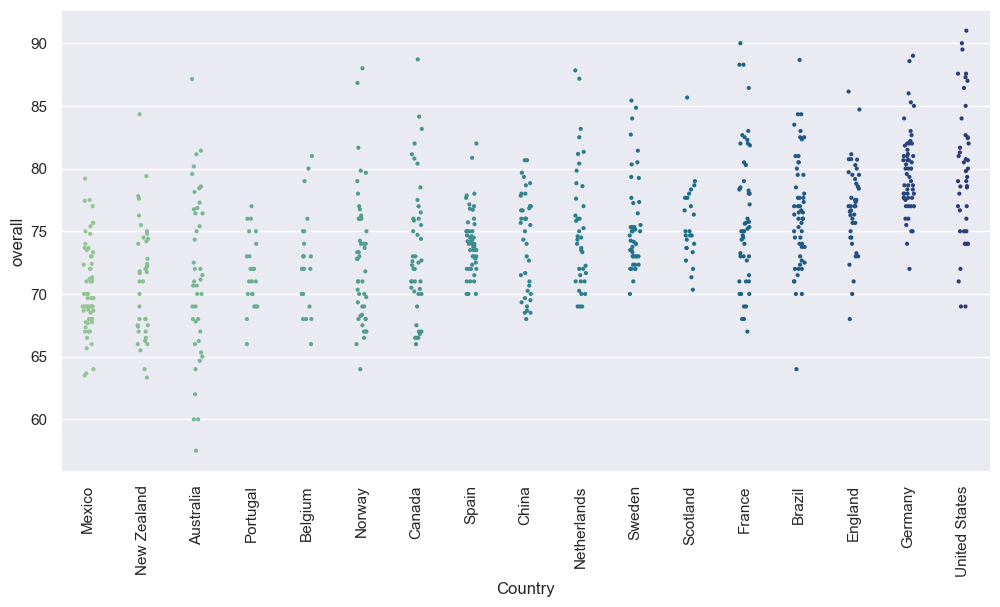

In [20]:
get_strip(rating16_22_new, 'overall')
#plt.savefig('../imgs/FIFA_16-22/overall_rating.png',bbox_inches='tight')

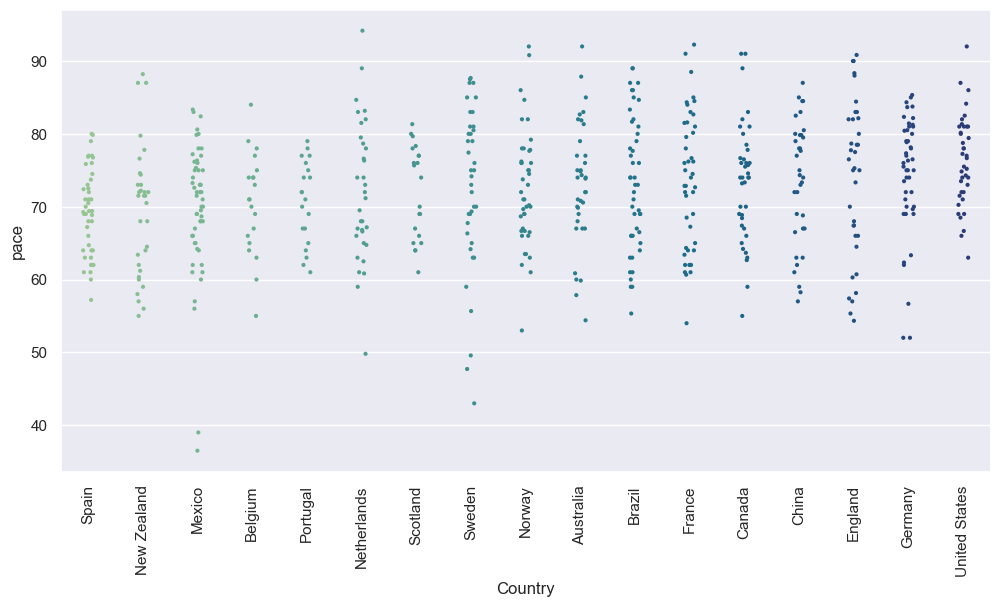

In [21]:
get_strip(rating16_22_new, 'pace')
#plt.savefig('../imgs/FIFA_16-22/pace.png',bbox_inches='tight')

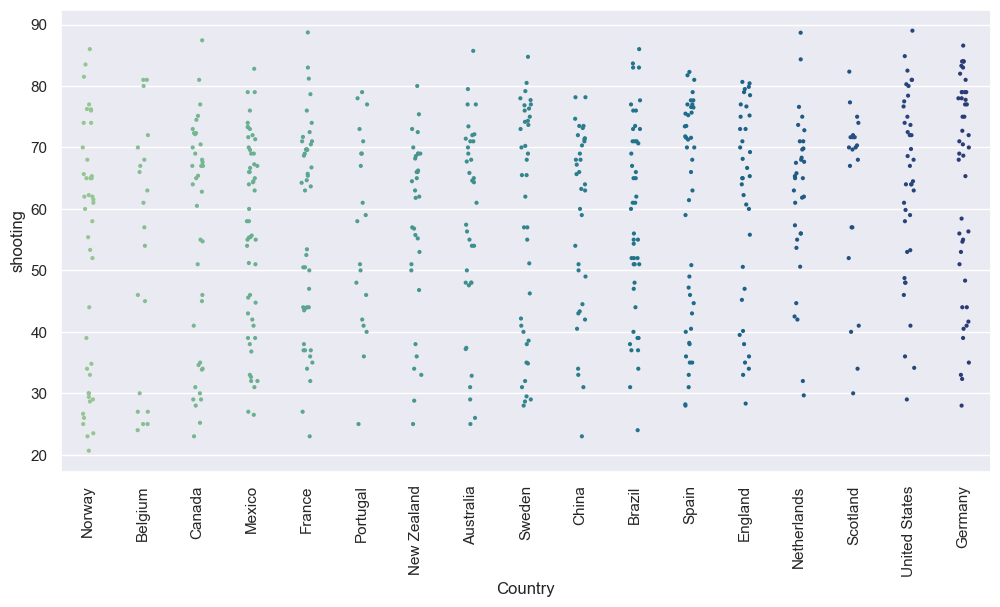

In [22]:
get_strip(rating16_22_new, 'shooting')
#plt.savefig('../imgs/FIFA_16-22/shooting.png',bbox_inches='tight')

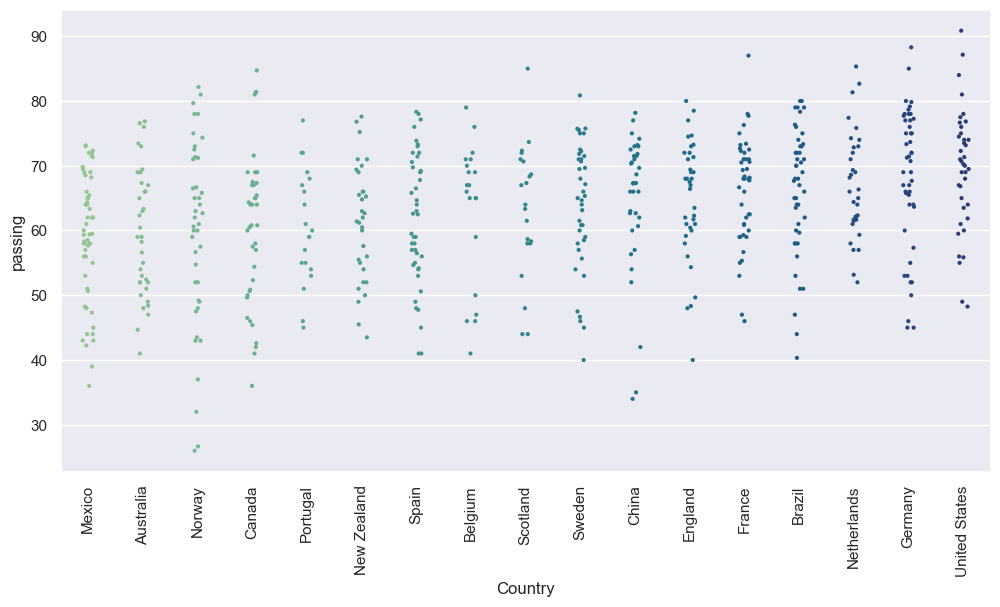

In [23]:
get_strip(rating16_22_new, 'passing')
#plt.savefig('../imgs/FIFA_16-22/passing.png',bbox_inches='tight')

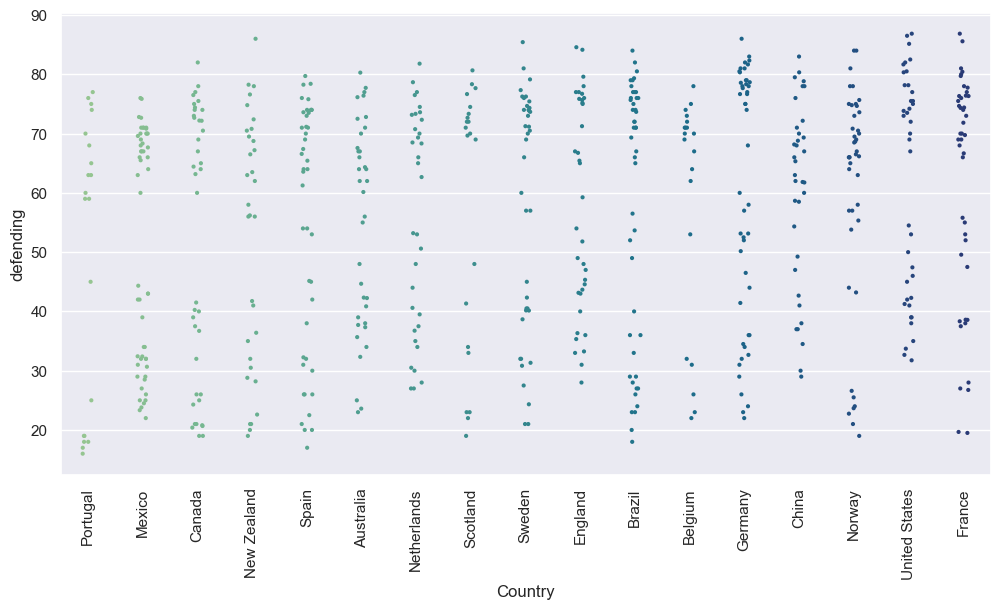

In [24]:
get_strip(rating16_22_new, 'defending')
#plt.savefig('../imgs/FIFA_16-22/defending.png',bbox_inches='tight')

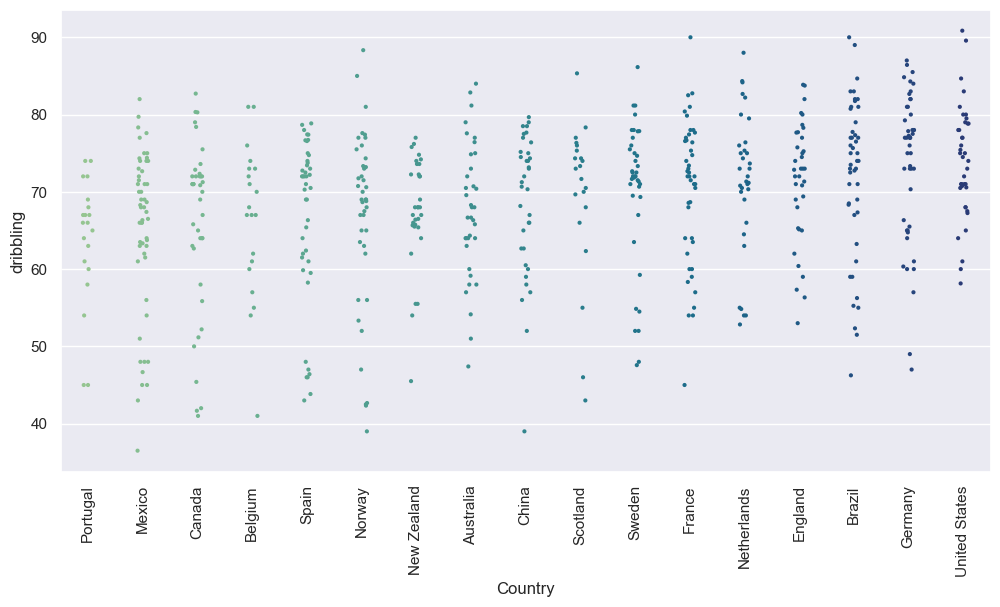

In [25]:
get_strip(rating16_22_new, 'dribbling')
#plt.savefig('../imgs/FIFA_16-22/dribbling.png',bbox_inches='tight')

In [26]:
rating23 = pd.read_csv('../Datasets/cleaned_data/FIFA23_rating_new.csv')

In [27]:
rating23.head()

,full_name,nationality,birthyear,position,height,weight,overall,pace,shooting,passing,dribbling,defending,phy,longshots,volleys,balance,shotpower,longpassing,standingtackle,crossing,curve,finishing,slidingtackle,aggression,sprintspeed,headingaccuracy,reactions,ranking,penalties,strength,skillmoves,stamina,ballcontrol,acceleration,preferredfoot,vision,agility,composure,jumping,interceptions,shortpassing
0,Alexia Putellas Segura,45,1994,CM,173,67,92,80,90,92,91,72,75,90,90,78,81,91,82,87,89,94,64,58,78,74,95,1,91,75,5,90,94,82,2,95,76,91,75,79,95
1,Sam Kerr,195,1993,ST,168,66,91,87,91,75,90,42,83,89,92,82,91,55,39,80,76,93,35,70,85,91,93,2,79,86,4,87,92,89,1,83,90,92,91,24,78
2,Wendie Renard,18,1990,CB,187,70,91,67,72,71,72,93,87,65,55,34,85,87,94,51,65,70,91,88,66,96,90,3,75,93,2,75,85,68,1,59,53,84,86,90,84
3,Ada Hegerberg,36,1995,ST,176,68,91,85,91,77,87,39,77,89,90,47,86,72,33,71,79,94,29,65,86,93,93,4,86,81,4,75,91,83,1,76,74,86,89,23,84
4,Marie Katoto,18,1998,ST,177,66,90,88,90,78,86,39,74,87,91,68,86,70,35,71,71,93,29,44,88,92,90,5,82,81,4,82,89,89,1,79,80,85,86,27,87


In [28]:
len(rating23.nationality.unique())

43

In [29]:
nation_list = rating23.nationality.unique()

In [30]:
nation_list

array([ 45, 195,  18,  36,  14,  95,  55,  34,  21,  42,  70,   4,  13,
        37,  46,  25, 133,  83,  47,  43,  17,  61, 163,  50,  24,  54,
       155,  12,   7, 198,  27, 103,  72, 167,  82,  52,  40,  38,  80,
       108, 126, 129,  22], dtype=int64)

In [31]:
nation_dict = {}

In [32]:
for num in nation_list:
    r = requests.get('https://www.ea.com/games/fifa/fifa-23/womens-ratings/player-filter/player-nationality/'+str(num))
    soup = BeautifulSoup(r.content, 'html.parser')
    title = soup.find('title')
    nation_dict[num] = title.text.split()[0]

In [34]:
nation_dict[95] = 'United States'

In [35]:
nation_dict[25] = 'Ireland'

In [36]:
nation_dict[34] = 'Netherlands'

In [37]:
nation_dict[198] = 'New Zealand'

In [38]:
rating23['nationality'] = rating23['nationality'].replace(nation_dict)

In [39]:
rating23.shape

(500, 41)

In [40]:
rating23.head()

,full_name,nationality,birthyear,position,height,weight,overall,pace,shooting,passing,dribbling,defending,phy,longshots,volleys,balance,shotpower,longpassing,standingtackle,crossing,curve,finishing,slidingtackle,aggression,sprintspeed,headingaccuracy,reactions,ranking,penalties,strength,skillmoves,stamina,ballcontrol,acceleration,preferredfoot,vision,agility,composure,jumping,interceptions,shortpassing
0,Alexia Putellas Segura,Spain,1994,CM,173,67,92,80,90,92,91,72,75,90,90,78,81,91,82,87,89,94,64,58,78,74,95,1,91,75,5,90,94,82,2,95,76,91,75,79,95
1,Sam Kerr,Australia,1993,ST,168,66,91,87,91,75,90,42,83,89,92,82,91,55,39,80,76,93,35,70,85,91,93,2,79,86,4,87,92,89,1,83,90,92,91,24,78
2,Wendie Renard,France,1990,CB,187,70,91,67,72,71,72,93,87,65,55,34,85,87,94,51,65,70,91,88,66,96,90,3,75,93,2,75,85,68,1,59,53,84,86,90,84
3,Ada Hegerberg,Norway,1995,ST,176,68,91,85,91,77,87,39,77,89,90,47,86,72,33,71,79,94,29,65,86,93,93,4,86,81,4,75,91,83,1,76,74,86,89,23,84
4,Marie Katoto,France,1998,ST,177,66,90,88,90,78,86,39,74,87,91,68,86,70,35,71,71,93,29,44,88,92,90,5,82,81,4,82,89,89,1,79,80,85,86,27,87


In [41]:
rating23.isna().sum()

full_name        0
nationality      0
birthyear        0
position         0
height           0
                ..
agility          0
composure        0
jumping          0
interceptions    0
shortpassing     0
Length: 41, dtype: int64

In [42]:
nation_count = rating23.nationality.value_counts()

In [449]:
keys = nation_count.loc[nation_count >6].index

In [450]:
rating23_to_plot= rating23[rating23['nationality'].isin(keys)]

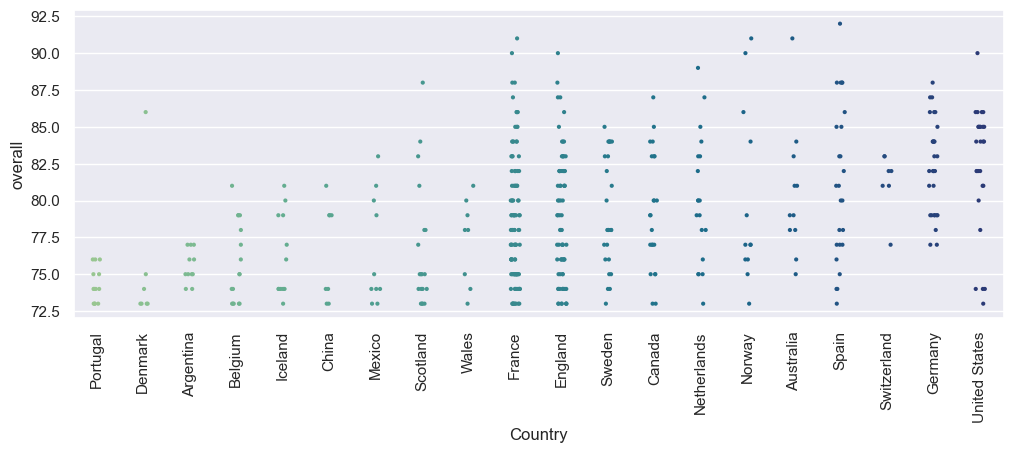

In [518]:
get_strip(rating23_to_plot, 'overall', figsize = (12,4))
plt.savefig('../imgs/FIFA_23/overall_rating.png',bbox_inches='tight')

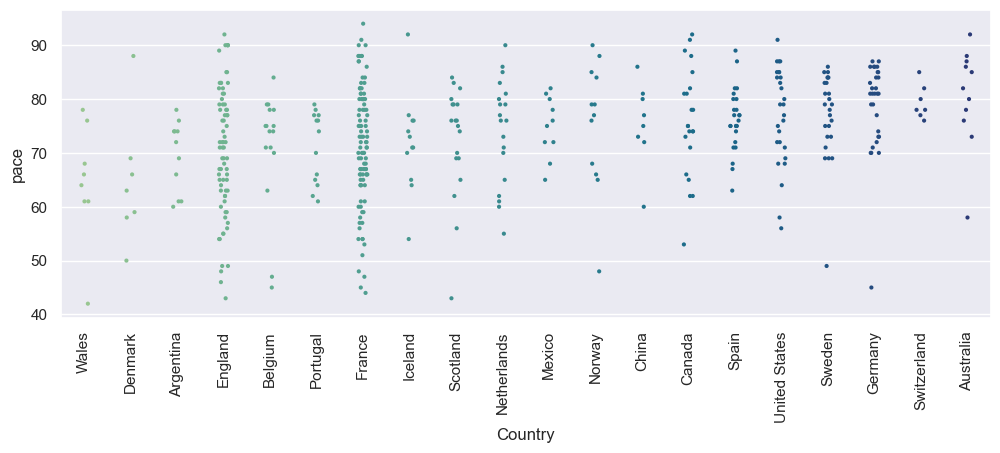

In [519]:
get_strip(rating23_to_plot, 'pace', figsize = (12,4))
plt.savefig('../imgs/FIFA_23/pace.png',bbox_inches='tight')

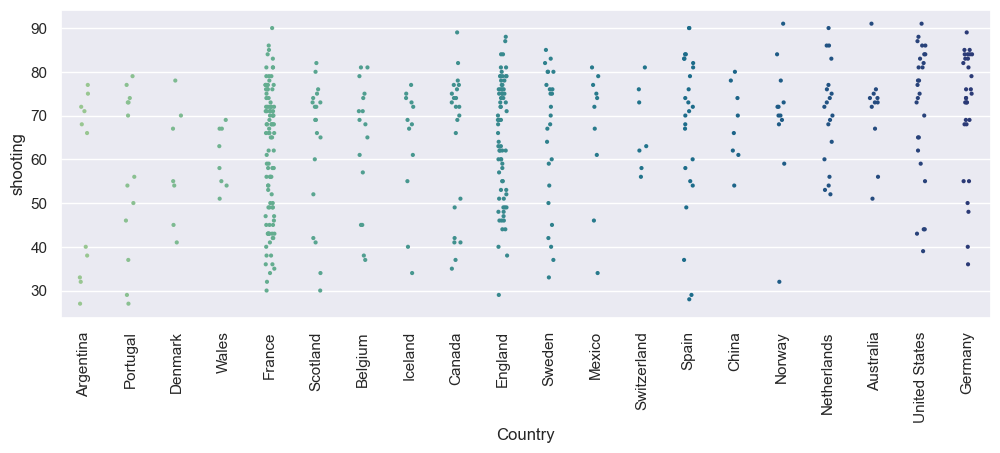

In [520]:
get_strip(rating23_to_plot, 'shooting', figsize = (12,4))
plt.savefig('../imgs/FIFA_23/shooting.png',bbox_inches='tight')

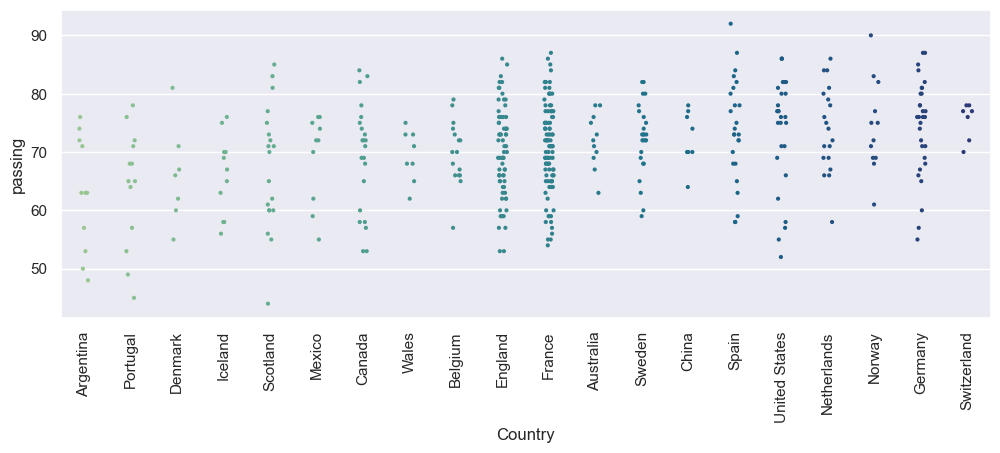

In [521]:
get_strip(rating23_to_plot, 'passing', figsize = (12,4))
plt.savefig('../imgs/FIFA_23/passing.png',bbox_inches='tight')

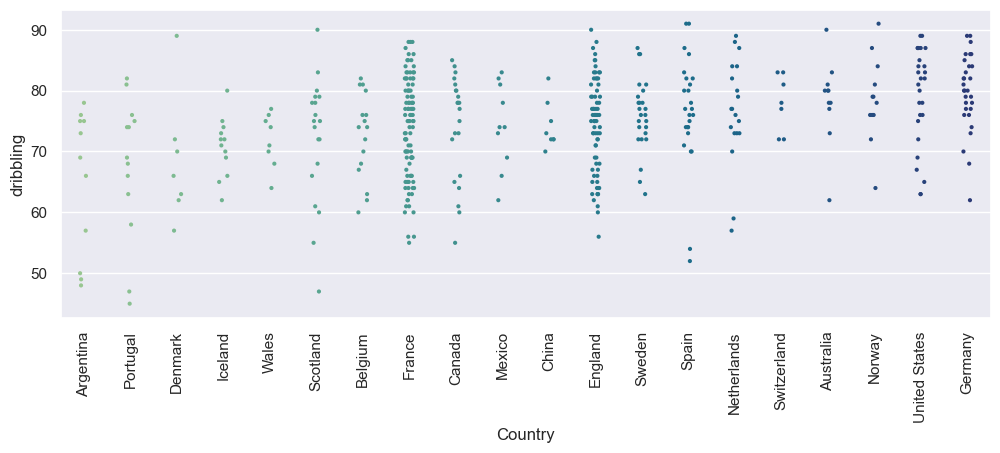

In [522]:
get_strip(rating23_to_plot, 'dribbling', figsize = (12,4))
plt.savefig('../imgs/FIFA_23/dribbling.png',bbox_inches='tight')

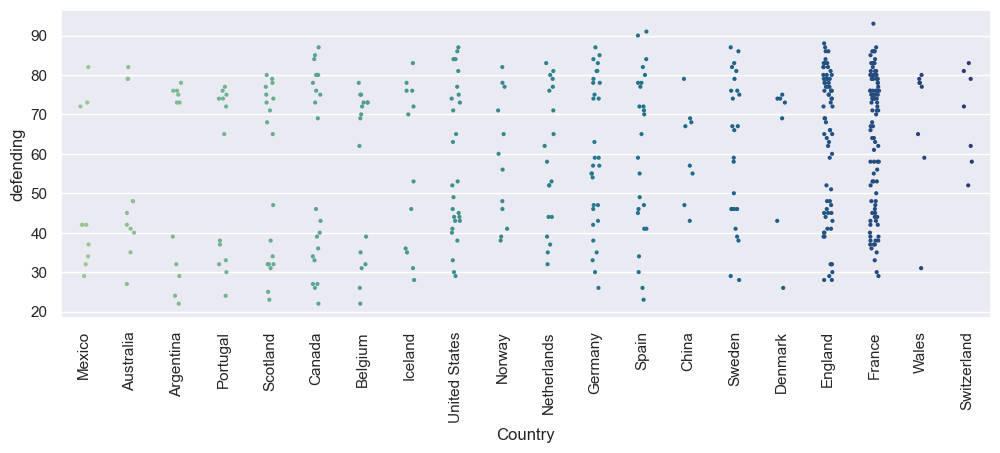

In [523]:
get_strip(rating23_to_plot, 'defending', figsize = (12,4))
plt.savefig('../imgs/FIFA_23/defending.png',bbox_inches='tight')

In [457]:
rating16 = pd.read_csv('../Datasets/cleaned_data/FIFA16_rating_new.csv')
rating17 = pd.read_csv('../Datasets/cleaned_data/FIFA17_rating_new.csv')
rating18 = pd.read_csv('../Datasets/cleaned_data/FIFA18_rating_new.csv')
rating19 = pd.read_csv('../Datasets/cleaned_data/FIFA19_rating_new.csv')
rating20 = pd.read_csv('../Datasets/cleaned_data/FIFA20_rating_new.csv')
rating21 = pd.read_csv('../Datasets/cleaned_data/FIFA21_rating_new.csv')
rating22 = pd.read_csv('../Datasets/cleaned_data/FIFA21_rating_new.csv')

In [458]:
rating16_avg = rating16.groupby(by = ['nationality'], as_index = False).mean()
rating17_avg = rating17.groupby(by = ['nationality'], as_index = False).mean()
rating18_avg = rating18.groupby(by = ['nationality'], as_index = False).mean()
rating19_avg = rating19.groupby(by = ['nationality'], as_index = False).mean()
rating20_avg = rating20.groupby(by = ['nationality'], as_index = False).mean()
rating21_avg = rating21.groupby(by = ['nationality'], as_index = False).mean()
rating22_avg = rating22.groupby(by = ['nationality'], as_index = False).mean()

In [459]:
rating_sq = pd.concat([rating16_avg.assign(source='16'), rating17_avg.assign(source = '17'),
                      rating18_avg.assign(source='18'), rating19_avg.assign(source = '19'),
                      rating20_avg.assign(source='20'), rating21_avg.assign(source = '21'),
                      rating22_avg.assign(source='22')])

In [471]:
rating23_avg = rating23_to_plot.groupby(by = ['nationality'], as_index = False).mean()

In [461]:
sq_columns = ['nationality', 'height', 'weight', 'overall', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'source']        

In [462]:
rating_sq= rating_sq[sq_columns]

In [472]:
rating23_avg['source'] = '23'

In [473]:
rating23_avg= rating23_avg[sq_columns]

In [474]:
rating_sq_all = pd.concat([rating_sq, rating23_avg])

In [475]:
rating_sq_all.tail()

,nationality,height,weight,overall,pace,shooting,passing,dribbling,defending,source
15,Spain,166.080000,58.160000,81.160000,76.200000,67.88000,73.720000,76.560000,60.240000,23
16,Sweden,171.760000,63.280000,79.240000,77.120000,65.20000,72.240000,76.080000,61.000000,23
17,Switzerland,167.571429,59.428571,81.285714,79.428571,67.00000,75.428571,78.000000,69.571429,23
18,United States,170.629630,61.666667,82.333333,76.962963,71.62963,73.777778,79.222222,57.407407,23
19,Wales,171.000000,62.875000,77.250000,64.500000,60.50000,69.375000,71.875000,68.375000,23


In [469]:
rating_sq.nationality.replace({'China PR':'China'}, inplace = True)

In [470]:
rating_sq.nationality.unique()

array(['Australia', 'Brazil', 'Canada', 'China', 'England', 'France',
       'Germany', 'Mexico', 'Spain', 'Sweden', 'United States',
       'Netherlands', 'Norway', 'New Zealand', 'Scotland'], dtype=object)

In [476]:
rating23_avg.nationality.unique()

array(['Argentina', 'Australia', 'Belgium', 'Canada', 'China', 'Denmark',
       'England', 'France', 'Germany', 'Iceland', 'Mexico', 'Netherlands',
       'Norway', 'Portugal', 'Scotland', 'Spain', 'Sweden', 'Switzerland',
       'United States', 'Wales'], dtype=object)

In [477]:
nations = rating_sq_all.nationality.unique()